<a href="https://colab.research.google.com/github/sooonsyk/ESAA-22-2/blob/main/W14_HW_mon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3. 1\~4 pg. 50\~95
# 3. 케라스 Keras

## 딥러닝 준비
### 1-1 주요 용어
1. 하이퍼 파라미터 : 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값
2. 과소적합 vs 과대적합 : 모델이 충분히 학습되지 않은 경우/학습데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태
3. 에포크 : 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 1에포크라함
4. 손실함수 : 예측값고 정답값의 차이 또는 오차, 딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야 함, 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적
    - 지도 학습 이진 분류 = binary_crossentropy, 출력층의 활서와 함수가 sigmoid인 경우
    - 지도 학습 다중 분류 = categorical_crossentropy, 다중 분류 대상 클래스가 one hot vector 인 경우 사용
                     = sparse_categorical_crossentropy , 정답 클래스가 원핫 인코딩이 아닌 레이블값으로 표현되어 서로 다른 숫자로 구분된 경우
        - 출력층의 활성함수로 sotfmax 사용
    - 회귀 : 평균 제곱 오차, 평균 절대값 오차, 후버 등
5. 경사하강법 : 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법
    $Loss = 1/2\Sigma(y-\haty)^2$
    - 1/2 는 가중치에 대한 그래디언트를 계산하기 쉽도록 추가된 상수 값
    

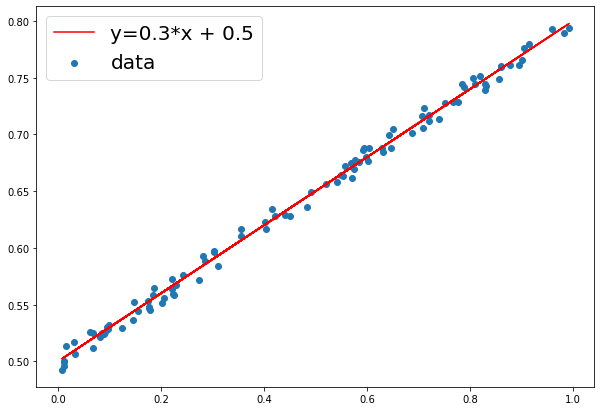

w : 0.3, b:0.5


In [15]:
#y = wx + b 의 단순 선형 회귀 수식이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정 구현
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=0.1):
    x = np.random.rand(size)
    y = w*x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)  #노이즈 추가
    yy = y + noise
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color='r', label=f'y={w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w : {w}, b:{b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [16]:
#최대 반복 횟수
num_epoch =1000

#학습률 learning rate
learning_rate = 0.005

#에러 기록
errors = []

#random한 값으로 w, b 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    #가설함수 정의
    y_hat = w*x + b
    
    #loss function 정의
    error = 0.5*((y_hat-y)**2).sum()
    
    #오차가 0.005 이내로 수렵하면 종료
    if error < 0.005:
        break
        
    #gradient 미분 계산 
    w = w-learning_rate * ((y_hat-y)*x).sum()
    b = b-learning_rate * (y_hat-y).sum()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print('{0:2} w = {1:.5f}, b={2:.5f} error={3:.5f}'.format(epoch, w, b, error))
        
print('----' * 15)
print('{0:2} w = {1:.5f}, b={2:.5f} error={3:.5f}'.format(epoch, w, b, error))

 0 w = 0.73274, b=0.59756 error=32.49037
 5 w = 0.55951, b=0.37416 error=0.31586
10 w = 0.51620, b=0.39288 error=0.21949
15 w = 0.48088, b=0.41031 error=0.15384
20 w = 0.45137, b=0.42488 error=0.10798
25 w = 0.42671, b=0.43707 error=0.07595
30 w = 0.40609, b=0.44725 error=0.05357
35 w = 0.38886, b=0.45576 error=0.03794
40 w = 0.37446, b=0.46287 error=0.02702
45 w = 0.36243, b=0.46882 error=0.01940
50 w = 0.35237, b=0.47379 error=0.01407
55 w = 0.34396, b=0.47794 error=0.01035
60 w = 0.33694, b=0.48141 error=0.00775
65 w = 0.33107, b=0.48431 error=0.00593
------------------------------------------------------------
69 w = 0.32802, b=0.48582 error=0.00488


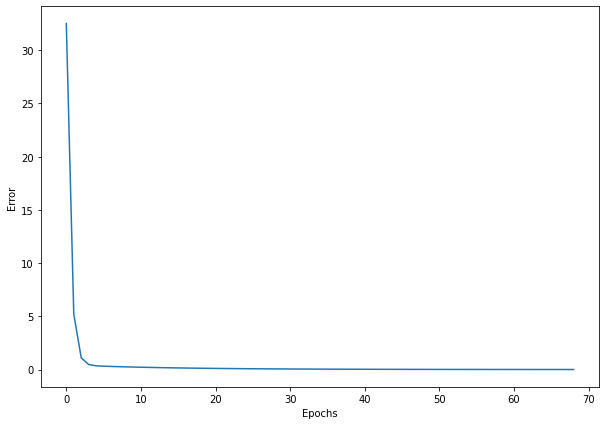

In [17]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### 1-2 딥러닝 프로세스
1. 데이터 전처리 : 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계
2. 모델 생성 : 모델의 구조를 정의하고 생성하는 단계
3. 모델 컴파일 : 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 결정
4. 모델 훈련 : fit()함수에 모델 훈련에 필요한 정보를 매개변수로 전달
5. 모델 검증 : 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표 계산, 검증 결과를 바탕으로 성능 평가가 이루어지고 다시 모델 생성 단계로 돌아가 모델을 수정하고 재평가하는 단계 반복
6. 모델 예측 : 테스트셋에 대하여 예측

## 2. 단순 신경망 훈련
### 2-1 선형 회귀
- 회귀 분석 : 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법
- 단순선형회귀 : 하나의 X가 Y에 미치는 영향 추정

### 2-2 뉴런 
- 뉴런 : 인공 신경망 모델을 구성하는 하나의 신겨으 노드라고도 불림
- 신경망은 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성, 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트 됨
    - 역전파 알고리즘 : 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법 의미, 역전파는 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그래디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장함
    
### 2-3 Dense 레이어
- Dense 레이어 : 심층 신경망 모델을 구성하는 가장 기본 레이어, 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층이라고도 부름
    - Dense 레이어를 구성하는 노드 개수와 활성화 함수 지정할 수 있음

In [18]:
import tensorflow as tf

#10개의 node로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### 2-4 데이터셋 만들기

In [19]:
import numpy as np

#샘플 데이터셋 생성
x = np.arange(1,6)

#y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


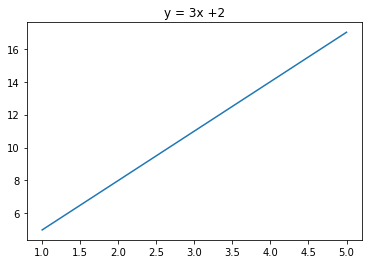

In [20]:
#시각화
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.title('y = 3x +2')
plt.show()

### 2-5 Sequential API
- 텐서플로 케라스는 세가지 방식으로 모델 생성 가능
- Sequential API : 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식, 입력 레이어부터 출력 레이어까지 순서 가짐, 레이어 개수 제한 없음
    - 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조 만들 수 없음 - Functional API 사용해야 함
1. 모델 구조 - 두가지로 구성할 수 있음
  - 리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층 입력 
  - add 함수로 레이어 추가로 Sequential 클래스 객체를 먼저 만든 후에 생성된 모델 인스턴스에 층을 추가하는 방식

In [21]:
import tensorflow as tf

#리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [22]:
#add 함수로 layer 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

2. 입력 데이터 형태
- 반드시 첫 번째 층은 input_shape 매개변수를 지정해야 함, 주입할 데이터 셋의 shape을 tuple 혹은 list로 지정할 수 있음

In [23]:
model = tf.keras.Sequential([
    #입력 데이터의 shape=(150,4)인 경우 input_shape 지정 - 150개의 샘플에 대해서 4개의 입력 변수가 존재한다는 의미
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

3. 단순선형회귀 모델 정의
- 1개의 뉴런을 가지는 Dense 레이어 한 개 사용, 1개의 뉴런은 기울기에 해당하는 w와 상수항에 해당하는 b를 매개변수로 가짐
- Dense 레이어는 use_bias=True가 기본 설정되어 상수항 b가 추가됨

In [24]:
#단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) #뉴런 1개, 입력 변수 x 1개
])

### 2-6 모델 요약

In [25]:
#모델 요약 내용 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


  - Total params : 모델 내부에 존재하는 모든 파라미터의 합계 표기
  - Trainable params : 모델 훈련 시 업데이트 할 파라미터의 총 개수 - w,b로 두 개
  - Non-trainable params : 훈련 시 업데이트하지 않을 파라미터의 총 개수

###2-7 컴파일
- 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의함
- 클래스 인스턴스, 함수 혹은 사전 정의된 문자열로 지정할 수 있음 - 문자열로 지정하면 기본 하이퍼파라미터 사용

In [26]:
#긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [27]:
#짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])

In [28]:
#클래스 인스턴스 지정
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.005), #확률적 경사 하강법
              loss = tf.keras.losses.MeanAbsoluteError(),
              metrics = [tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanSquaredError()
                         ])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [29]:
#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### 2-8 훈련

In [30]:
#훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 434ms/step - loss: 148.5721 - mae: 11.3620
Epoch 2/5
1/1 [==============================] - 0s 31ms/step - loss: 86.6636 - mae: 8.7151
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 50.5858 - mae: 6.6944
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 29.5609 - mae: 5.1517
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 17.3081 - mae: 3.9739


In [31]:
#단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#훈련
history  = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 675ms/step - loss: 130.4618 - mae: 10.6664
Epoch 2/1200
1/1 [==============================] - 0s 15ms/step - loss: 76.1194 - mae: 8.1864
Epoch 3/1200
1/1 [==============================] - 0s 9ms/step - loss: 44.4508 - mae: 6.2932
Epoch 4/1200
1/1 [==============================] - 0s 10ms/step - loss: 25.9953 - mae: 4.8477
Epoch 5/1200
1/1 [==============================] - 0s 9ms/step - loss: 15.2397 - mae: 3.7442
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 8.9712 - mae: 2.9016
Epoch 7/1200
1/1 [==============================] - 0s 7ms/step - loss: 5.3177 - mae: 2.2582
Epoch 8/1200
1/1 [==============================] - 0s 8ms/step - loss: 3.1880 - mae: 1.7669
Epoch 9/1200
1/1 [==============================] - 0s 9ms/step - loss: 1.9463 - mae: 1.3917
Epoch 10/1200
1/1 [==============================] - 0s 8ms/step - loss: 1.2221 - mae: 1.1052
Epoch 11/1200
1/1 [==============================] - 0s 8

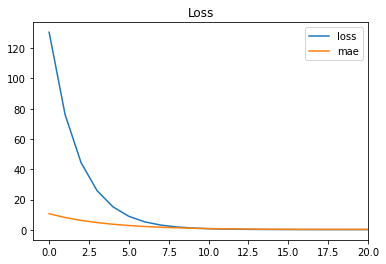

In [32]:
#20 epochs까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

### 2-9 검증
- evaluate 메소드로 모델 성능 검증할 수 있음
- 일반적으로 검증 데이터셋 입력해서 검증

In [33]:
model.evaluate(x,y)

1/1 [==============================] - 0s 359ms/step - loss: 6.6708e-05 - mae: 0.0070


[6.67077474645339e-05, 0.007010268978774548]

### 2-10 예측

In [34]:
model.predict([10])  #y=32

1/1 [==============================] - 0s 232ms/step


array([[32.033882]], dtype=float32)

##3.심층 신경망으로 이미지 분류
### 3-1 케라스 내장 데이터셋 로드

In [35]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [37]:
#load_data()로 데이터셋 로드 - train, test 따로 제공
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [38]:
#확인
print('train set :', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)

train set : (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)


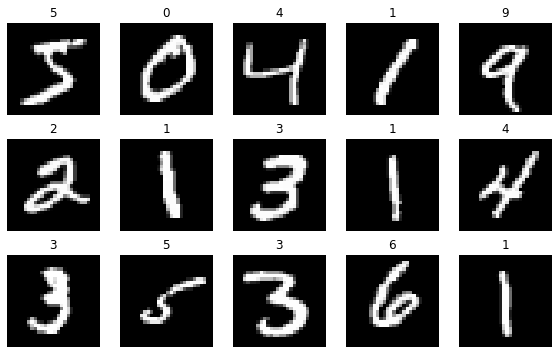

In [39]:
#시각화

#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  #imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

###3-2 데이터 전처리
- x_train : 넘파이 배열, 배열의 각 원소는 이미지를 구성하는 하나의 픽셀값과 일대일 매칭
- 입력 데이터 정규화하면 경사하강법의 수렴 속도가 빨라지고 국소 최적에 빠지는 현상 방지해줌

In [40]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [41]:
#픽셀 값의 최소/최댓값 확인
print(f'정규화 전] 최소값 : {x_train.min()}, 최댓값 : {x_train.max()}')

#데이터 정규화
x_train = x_train/x_train.max()

#정규화 후 최소/최댓값 확인
print(f'정규화 후] 최소값 : {x_train.min()}, 최댓값 : {x_train.max()}')

정규화 전] 최소값 : 0, 최댓값 : 255
정규화 후] 최소값 : 0.0, 최댓값 : 1.0


In [42]:
#test에도
x_test = x_test/x_test.max()

In [43]:
#다시 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3-3 Flatten 레이어
- 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없음

In [44]:
#1차원으로 전처리
print(f'변경 전 shape : {x_train.shape}')
print(f'1D로 shape 변경 후 : {x_train.reshape(60000,-1).shape}')

변경 전 shape : (60000, 28, 28)
1D로 shape 변경 후 : (60000, 784)


In [45]:
#Flatten 레이어 적용
print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

Flatten 적용 후 : (60000, 784)


### 3-4 활성화 함수
- 활성화 함수 : 입력을 비선형 출력으로 변환해주는 함수, 일밙거으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현하기도 함
  - 비선형성을 추가하지 않고 선형 함수로만 층을 구성하면 모델 깊게 구성해도 결국 선형함수로 표현됨
  - 시그모이드, 하이퍼볼릭 탄젠트, ReLU, Leaky ReLU

In [46]:
#Dense레이어에 relu 활성화 함수 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [ ]:
#Dense레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3-5 입력과 출력
- 첫번째 레이어의 입력 데이터의 형태 나타내는 input_shape 지정
- 마지막 레이어는 출력층, 출력층의 노드 개수는 반드시 분류해야 할 클래스의 수와 동일해야함

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') #클래스 개수 = 노드 개수
])

In [48]:
#출력층 노드=1, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

#출력층 노드=2개이상, softmax
tf.keras.layers.Dense(10, activation='softmax')

### 3-6 손실함수

In [49]:
#이진 분류
model.compile(loss='binary_crossentropy')

In [ ]:
#y가 원핫벡터
model.compile(loss='categorical_crossentropy')

#y가 원핫벡터 아닐 경우
model.compile(loss='sparse_categorical_crossentropy')

### 3-7 옵티마이저
- 옵티마이저 : 손실을 낮추기 위해서 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법

In [50]:
#클래스 인스턴스로 지지ㅓㅇ
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')              

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 3-8 평가지표

In [51]:
#클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=[acc])

#문자열로 지정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9 훈련

In [52]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2222 - accuracy: 0.9344 - val_loss: 0.1365 - val_accuracy: 0.9569
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0911 - accuracy: 0.9717 - val_loss: 0.0787 - val_accuracy: 0.9762
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0668 - accuracy: 0.9789 - val_loss: 0.0805 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0497 - accuracy: 0.9839 - val_loss: 0.0768 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0791 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0337 - accuracy: 0.9891 - val_loss: 0.0736 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0288 - accuracy: 0.9903 - val_loss: 0.0978 - val_ac

### 3-10 평가

In [53]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증 셋 정확도 :', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0996 - accuracy: 0.9753
검증 셋 정확도 : 0.9753000140190125


### 3-11 예측

In [54]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [55]:
predictions[0]

array([3.4739369e-09, 1.7329010e-07, 9.7639422e-08, 1.5344683e-04,
       9.4875841e-10, 1.1515571e-05, 1.3844772e-13, 9.9976778e-01,
       1.2118579e-07, 6.6858782e-05], dtype=float32)

  - 개별 클래스에 대한 분류 확률 값

In [56]:
#0번 index에 대한 에측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 index에 대한 에측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


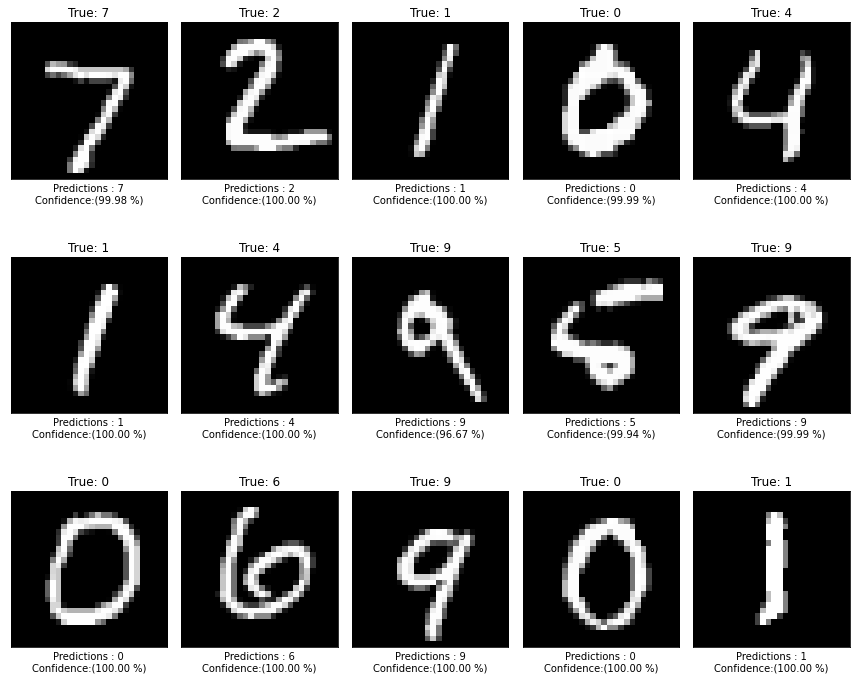

In [57]:
#15개 예측한 결과에 대한 시각화

def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
  return img, y_true, y_pred, confidence

#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)

  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Predictions : {y_pred}\nConfidence:({confidence:.2f} %)')

plt.tight_layout()
plt.show()

##4. 모델 세부 설정

### 4-1 초기값 설정

In [59]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [61]:
#문자열 초기화
dense = tf.keras.layers.Dense(356, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

#클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


### 4-2 규제
- 과대적합 해소하기 위해 L1, L2 규제 적용하기도 함

In [62]:
#기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_35',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [67]:
#L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha=0.1
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


### 4-3 드롭 아웃
- 딥러닝의 가장 큰 난제 과대적합
- 딥러닝 모델의 층이 넓고 깊어질 때 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향이 있음
- 모든 노드가 연결된ㄴ 것이 아니라 일부 신호를 임의로 삭제해서 과대적합 되는 것 방지
- 훈련할 때만 드롭아웃 적용됨, 예측할 때는 모든 노드 사용

In [68]:
#Dropout 25% 비율 적용 ( 25%의 노드가 삭제 )
tf.keras.layers.Dropout(0.25)

### 4-4 배치 정규화
- 배치 정규화 : 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화함, 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상 시킬 수 있음


In [69]:
#Model A : Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_a.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                50240     
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [74]:
#Model B : Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                     

### 4-5 활성화 함수

In [75]:
#LeakyReLu 기본 설정
tf.keras.layers.LeakyReLU()

#LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2) #인스턴스로 선언하여 하이퍼파라미터 적용

In [77]:
# Model C : Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #LeakyReLU, alpha=0.2
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_c.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_53 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                     

In [78]:
#앞의 3개의 모델 동일한 조건으로 10번 epoch동안 훈련한 후 수렴 속도 확인
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model A
history_a = model_a.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

#Model B
history_b = model_b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

#Model C
history_c = model_c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2951 - accuracy: 0.9141 - val_loss: 0.1519 - val_accuracy: 0.9560
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1377 - accuracy: 0.9583 - val_loss: 0.1167 - val_accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1009 - accuracy: 0.9692 - val_loss: 0.1307 - val_accuracy: 0.9602
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0801 - accuracy: 0.9755 - val_loss: 0.0966 - val_accuracy: 0.9708
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0662 - accuracy: 0.9789 - val_loss: 0.1021 - val_accuracy: 0.9703
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0552 - accuracy: 0.9823 - val_loss: 0.0922 - val_accuracy: 0.9745
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0496 - accuracy: 0.9837 - val_loss: 0.1055 - val_accur

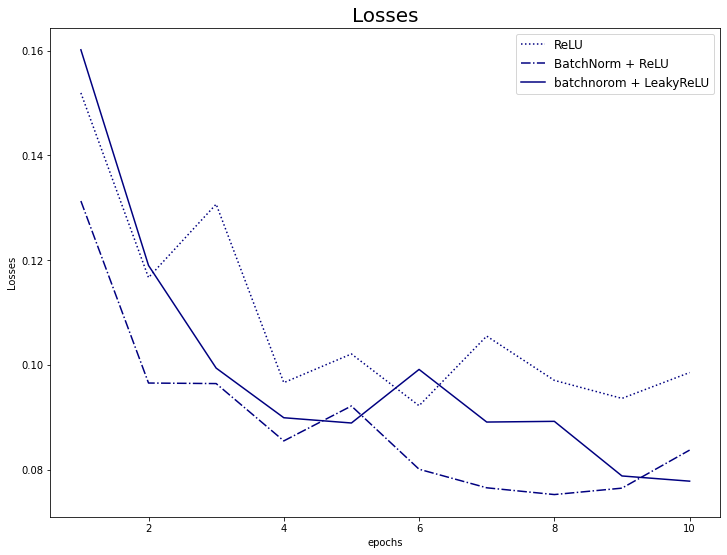

In [79]:
#시각화

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='navy', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='navy', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'batchnorom + LeakyReLU'], fontsize=12)
plt.show()